In [2]:
from calibration_tool import *
from data_prep import *

In [5]:
data = read_file("data/2025-07-04.h5")
data_sirta = data['IPRAL']

print(data['ATLID_L2_300km'].keys())


time= np.array(days_since_1970_to_datetime(data_sirta["time"]))

alt = np.array(data_sirta["range"])

print(np.shape(alt))

<KeysViewHDF5 ['AMB', 'AMB_clear', 'APB', 'conc', 'depol', 'file name', 'height', 'latitude', 'longitude', 'min_distance_km', 'min_index', 'particle_backscatter_coefficient_355nm', 'particle_backscatter_coefficient_355nm_error', 'particle_extinction_coefficient_355nm', 'particle_linear_depol_ratio_355nm_low_resolution', 'range', 'rayleigh_attenuated_backscatter_355nm', 'rayleigh_attenuated_backscatter_355nm_error', 'rayleigh_backscatter_355nm_model', 'simple_classification', 'time', 'total_attenuated_backscatter_355nm', 'total_attenuated_backscatter_355nm_error']>
(4000,)


In [6]:
def get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_12") :
  
    rcs = np.array(data_sirta[rcs_][:])
  
    back_rcs = np.array(data_sirta[f"bckgrd_{rcs_}"][:])
    rcs_rc = substract_bckgrd(rcs ,back_rcs , alt**2)
    
    return np.array(rcs_rc)




def get_indx_from_range_time_sirta( start_time, end_time , time ):

    start_time = np.datetime64(start_time)
    end_time = np.datetime64(end_time)
    
    indx_range = np.where((time >= start_time) & (time <= end_time))[0]
    
    return indx_range




rcs_12_rc = get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_12")
rcs_02_rc = get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_02")
rcs_03_rc = get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_03")
rcs_04_rc = get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_04")
rcs_05_rc = get_corrected_signal(data_sirta = data_sirta , alt = alt  ,rcs_="rcs_05")



print(np.shape(alt))

    

(4000,)


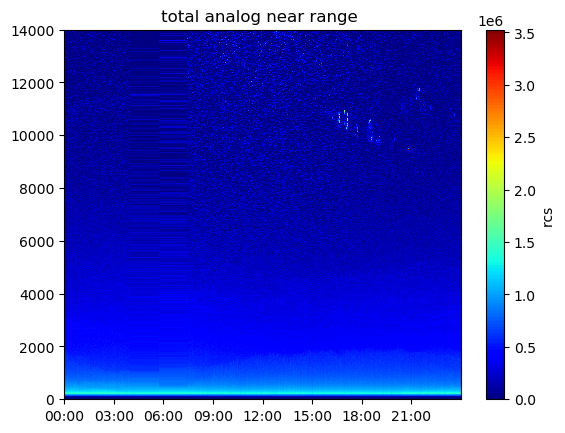

In [7]:
plt.set_cmap("jet")
plt.title("total analog near range ")
vmax_near_range= np.percentile(rcs_12_rc , 97)
plt.pcolormesh(time , alt ,(rcs_12_rc.T) , vmin = 0 , vmax=vmax_near_range)
plt.colorbar(label="rcs ")
plt.ylim((0,14000))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [8]:
delta_molecular = 0.0036  # Dépolarisation moléculaire typique

# signal_total_estimated = signal_parallel * (1 + delta_molecular)

# analog_signal = rcs_02_rc *(1 + delta_molecular)    #+   rcs_04_rc    /parallel 
# photocounting_signal = rcs_03_rc *(1 + delta_molecular) # +  rcs_05_rc  / parallel






analog_signal = rcs_02_rc
photocounting_signal = rcs_03_rc +  rcs_05_rc  

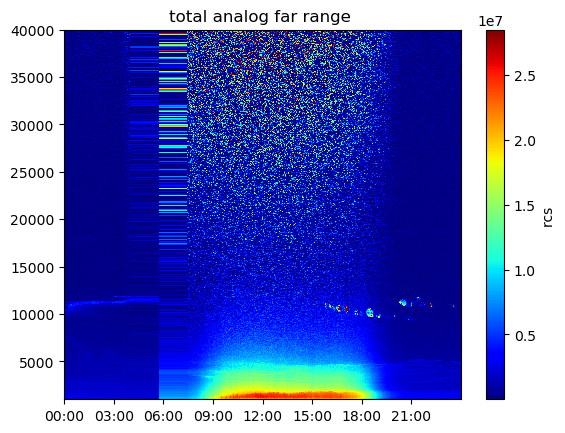

In [11]:

plt.set_cmap("jet")
plt.title("total analog far range ")
vmax_analog=np.percentile(analog_signal , 97)
plt.pcolormesh(time , alt ,analog_signal.T , vmin = 10.5 , vmax=vmax_analog)
plt.colorbar(label="rcs ")
plt.ylim((1000,40000))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

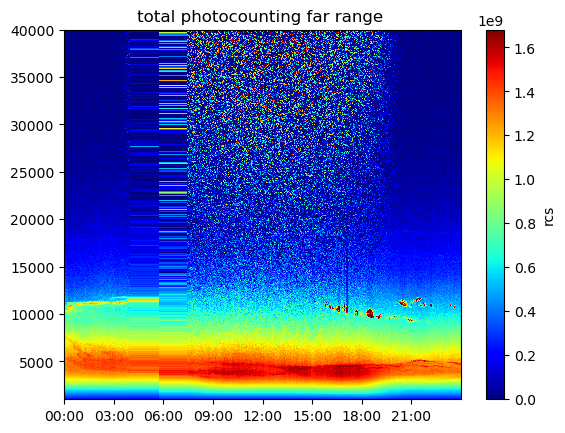

In [10]:
vmax_pho = np.percentile(photocounting_signal , 97)
plt.title("total photocounting far range ")

plt.pcolormesh(time , alt ,photocounting_signal.T , vmin = 0 , vmax=vmax_pho)
plt.colorbar(label="rcs")
plt.ylim((1000,40000))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [283]:
start_time_clear='2025-07-04T00:00:00'
end_time_clear='2025-07-04T01:00:00'

start_time_comp='2025-07-04T01:00:00'
end_time_comp='2025-07-04T01:30:00'

index_clear =np.array( get_indx_from_range_time_sirta(start_time_clear , end_time_clear , time))
index_comp = np.array(get_indx_from_range_time_sirta(start_time_comp , end_time_comp , time))

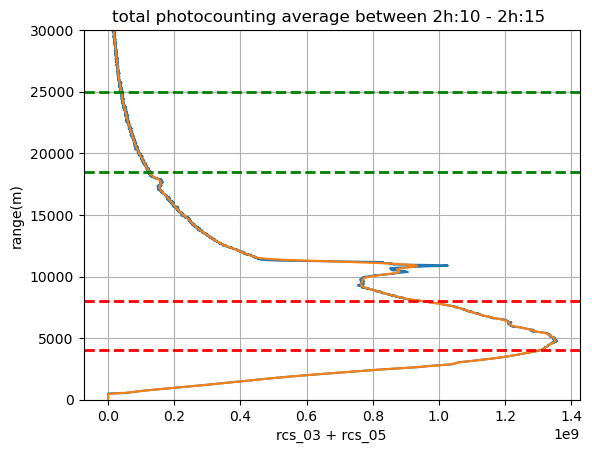

In [284]:

analog_signal_clear = analog_signal[index_clear , :]
photocounting_signal_clear = photocounting_signal[index_clear , :]

analog_avrg_clear = np.nanmean(analog_signal_clear , axis=0)
photocounting_avrg_clear = np.nanmean(photocounting_signal_clear , axis=0)


photocounting_filterd_clear = gaussian_filter(photocounting_avrg_clear, alt)
analog_filterd_clear = gaussian_filter(analog_avrg_clear , alt)

# photocounting_filterd = photocounting_avrg 
# analog_filterd = analog_avrg 


plt.plot(photocounting_avrg_clear , alt)
plt.plot(photocounting_filterd_clear , alt)
plt.title(f"total photocounting average between 2h:10 - 2h:15 ")
plt.ylabel("range(m)")
plt.xlabel("rcs_03 + rcs_05")

plt.axhline(y=4000, color='r', linestyle='--', linewidth=2, label='5 km')
plt.axhline(y=8000, color='r', linestyle='--', linewidth=2, label='9 km')


plt.axhline(y=18500, color='g', linestyle='--', linewidth=2, label='5 km')
plt.axhline(y=25000, color='g', linestyle='--', linewidth=2, label='9 km')


plt.ylim((0,30000))



plt.grid(True)


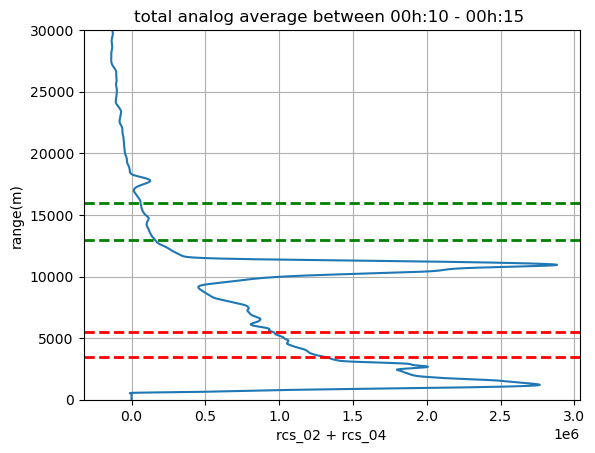

In [248]:

# plt.plot(analog_avrg_clear , alt)
plt.plot(analog_filterd_clear , alt)
plt.title(f"total analog average between 00h:10 - 00h:15 ")
plt.ylabel("range(m)")
plt.xlabel("rcs_02 + rcs_04")


plt.axhline(y=3500, color='r', linestyle='--', linewidth=2, label='5 km')
plt.axhline(y=5500, color='r', linestyle='--', linewidth=2, label='9 km')


plt.axhline(y=13000, color='g', linestyle='--', linewidth=2, label='5 km')
plt.axhline(y=16000, color='g', linestyle='--', linewidth=2, label='9 km')



plt.ylim((0,30000))




plt.grid(True)

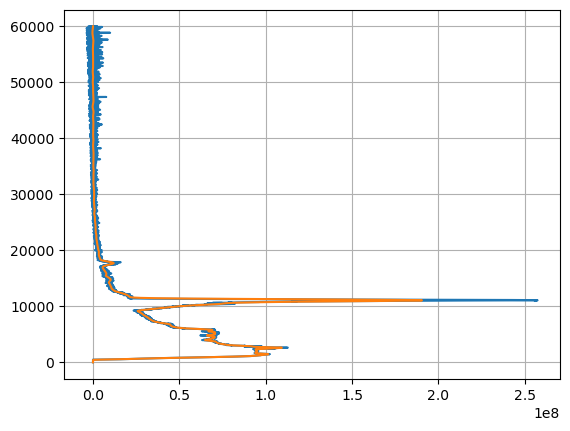

In [250]:



analog_signal_comp = analog_signal[index_comp , :]
photocounting_signal_comp = photocounting_signal[index_comp , :]

analog_avrg_comp = np.nanmean(analog_signal_comp , axis=0)
photocounting_avrg_comp = np.nanmean(photocounting_signal_comp , axis=0)

photocounting_for_comparision = gaussian_filter(photocounting_avrg_comp , alt)
analog_for_comparision = gaussian_filter(analog_avrg_comp , alt)


std_analog = np.std(analog_signal_comp , axis=0)
std_photo = np.std(photocounting_signal_comp , axis=0)







# photocounting_filterd = photocounting_avrg 
# analog_filterd = analog_avrg 


plt.plot(photocounting_avrg_comp , alt)
plt.plot(photocounting_for_comparision , alt)


plt.grid("True")


(0.0, 40000.0)

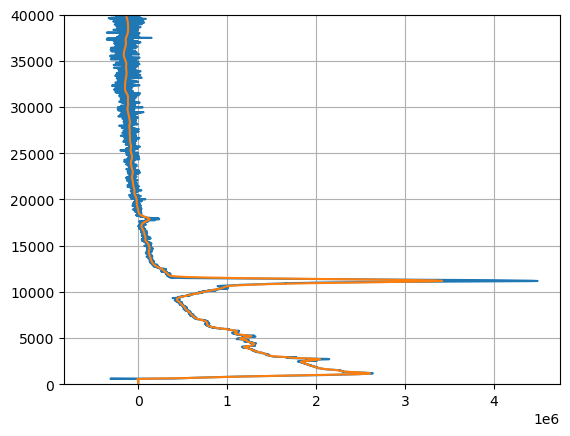

In [218]:
plt.plot(analog_avrg_comp , alt)
plt.plot(analog_for_comparision , alt)
plt.grid("True")
plt.ylim((0,40000))


Text(0.5, 1.0, 'conc')

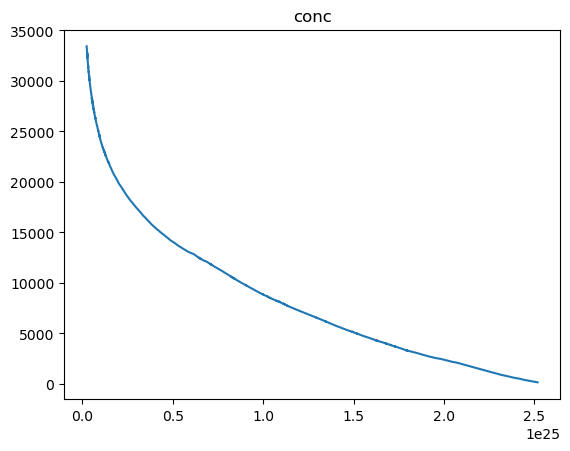

In [251]:
def conc_calculation (data_file_rs):

    Rd   = 287.              #gas constant for dry air [J/(kg.K)]
    Na = 6.022 * 10 **(23)
    Mair = 28.8*10**-3       # Masse molaire de l'air
    
    
    rs_data = read_nc_file(data_file_rs)
    
    alt= np.array(rs_data["alt"]) #alt max = 35408.438 m 

    P =np.array( rs_data["press"])    #air pressure hpa
    T=np.array(rs_data["temp"])   # temp_raw    K
    ro = (100 *P)/(Rd*T)
    
    conc= ro * (Na /Mair )
    
    
    return [conc , alt] 



rs_file = "2025_07_04/rs_2a_GRUAN_TRP_M10_20250704_231547_v2.0.1.nc"
conc  = conc_calculation (rs_file)





plt.plot(conc[0], conc[1])
plt.title("conc")



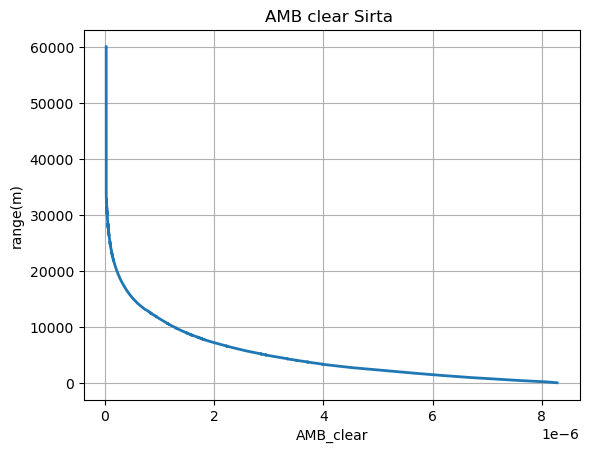

In [252]:


def calculate_AMB_clear(conc = conc[0], altitude_rs = conc[1] ,altitude_ipral = alt  ):
    
    conc = np.interp(altitude_ipral, altitude_rs, conc)


    RAYLEIGH_CROSS_SECTION = 3.2897988e-31  # [m2 sr-1]
    beta_ray_355 = conc * RAYLEIGH_CROSS_SECTION
    alpha_ray_355 = beta_ray_355 / 0.119 
    n=conc.shape[0]
    
    AMB_clear = np.full(n, np.nan)

    dz = (np.diff(altitude_ipral))
    trapz_coef = ((alpha_ray_355[:-1] + alpha_ray_355[ 1:]) / 2) * dz
    sum1 = np.insert( np.nancumsum(trapz_coef) ,0,0 )

    AMB_clear = beta_ray_355 * np.exp(-2.0 * sum1)    
    return AMB_clear  , beta_ray_355 , alpha_ray_355


AMB_clear  , beta_ray_355 , alpha_ray_355 =  calculate_AMB_clear()
plt.title("AMB clear Sirta ")
plt.plot(AMB_clear , alt , linewidth = 2)
plt.ylabel("range(m)")
plt.xlabel("AMB_clear")
plt.grid(True)




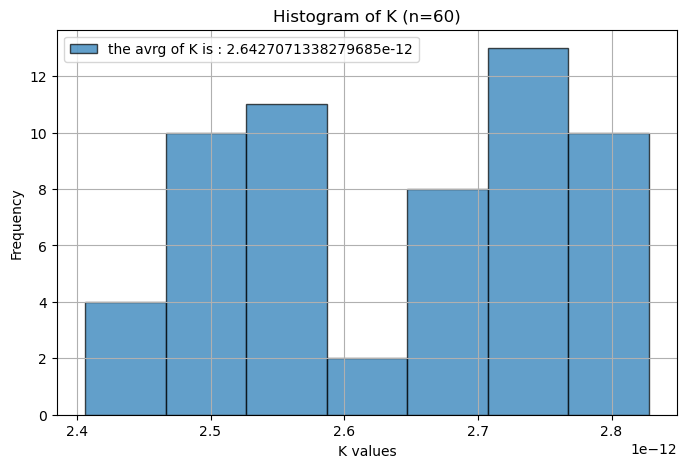

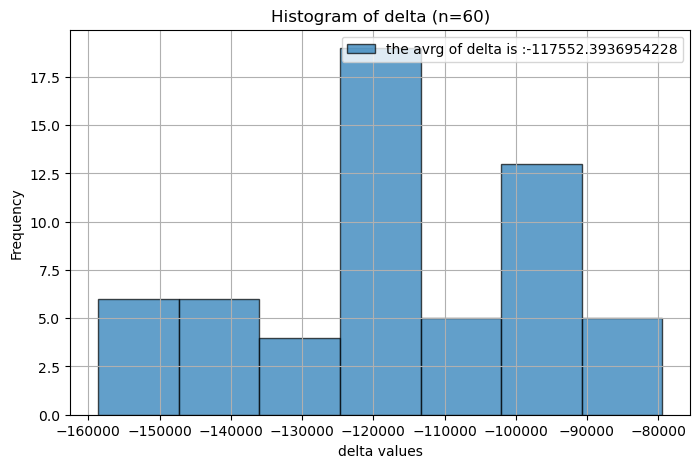

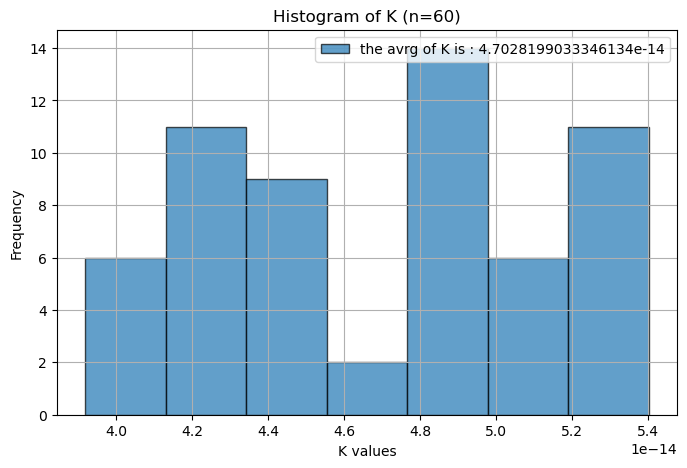

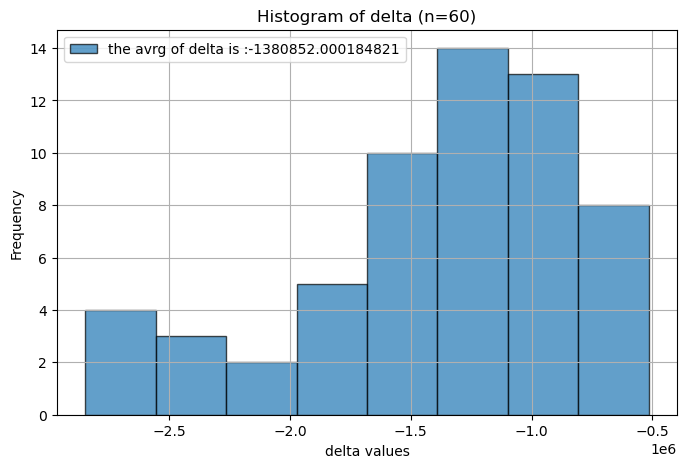

In [254]:
def Calibration(rcs , AMB_clear , altitude , calibration_mask1=[2000 , 5000] , calibration_mask2=[6000 , 10000] ,N =60 , visual = True , seed=True) :
    
    if (seed) :
    
        np.random.seed(5)  
    

    mask_1 = (altitude >= calibration_mask1[0]) & (altitude <= calibration_mask1[-1])
    indices_1 = np.where(mask_1)[0]
    selected_idx_1 = np.random.choice(indices_1, size=N, replace=True)
    
    

    mask_2 = (altitude >= calibration_mask2[0]) & (altitude <= calibration_mask2[-1])
    indices_2 = np.where(mask_2)[0]
    selected_idx_2 = np.random.choice(indices_2, size=N, replace=True)

    S1= rcs[selected_idx_1]
    S2=rcs[selected_idx_2]

    AMB_1=AMB_clear[selected_idx_1]
    AMB_2=AMB_clear[selected_idx_2]

    K = (AMB_1-AMB_2)/(S1-S2)
    delta= (S2*AMB_1 - S1*AMB_2)/(AMB_1-AMB_2)


    K_avrg = np.nanmean(K)
    delta_avrg = np.nanmean(delta)




    if(visual) :

        
        # --- Plot histogram of K ---

        plt.figure(figsize=(8, 5))
        plt.hist(K, bins='auto', edgecolor='black', alpha=0.7 , label =f"the avrg of K is : {K_avrg}")
        plt.xlabel('K values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of K (n={N})')
        plt.grid(True)
        plt.legend()
        plt.show()
        
        
        # --- Plot histogram of delta  ---
        
        plt.figure(figsize=(8, 5))
        plt.hist(delta, bins='auto', edgecolor='black', alpha=0.7 , label =f"the avrg of delta is :{delta_avrg}")
        plt.xlabel('delta values')
        plt.ylabel('Frequency')
        plt.title(f'Histogram of delta (n={N})')
        plt.grid(True)
        plt.legend()
        plt.show()





    return K_avrg , delta_avrg


K_avrg_analog_0 , delta_avrg_analog_0=Calibration(analog_filterd_clear , AMB_clear , alt ,  calibration_mask1=[3500 , 5500] , calibration_mask2=[13000 , 16000] ) 
K_avrg_ph_0 , delta_avrg_ph_0 =Calibration(photocounting_filterd_clear , AMB_clear , alt ,   calibration_mask1=[4000 , 8000] , calibration_mask2=[18500 , 25000]) 





def cost_function(params, rcs, amb_clear, correction_ranges, altitude):
    """
    correction_ranges: list of tuples [(min1, max1), (min2, max2), ...]
    """
    K_init, delta_init = params 
    
    # Créer un mask qui combine tous les ranges
    combined_mask = np.zeros_like(altitude, dtype=bool)
    
    for range_min, range_max in correction_ranges:
        mask = (altitude >= range_min) & (altitude <= range_max)
        combined_mask |= mask  # OR logique pour combiner les masks
    
    # Appliquer le mask combiné
    atb_masked = K_init * (rcs[combined_mask] - delta_init)
    amb_clear_masked = amb_clear[combined_mask]
    
    mape = np.nanmean(np.abs((atb_masked - amb_clear_masked) / amb_clear_masked)) * 100
    return mape


def optimize(rcs, AMB_clear, altitude, comparison_ranges, K_init, delta_init, method='Nelder-Mead'):
    """
    comparison_ranges: list of tuples for multiple ranges
    """
    from scipy.optimize import minimize
    
    initial_params = [K_init, delta_init]
    print(f"Valeurs initiales: K={K_init}, delta={delta_init}")
    
    result = minimize(
        cost_function,
        initial_params, 
        args=(rcs, AMB_clear, comparison_ranges, altitude),
        method=method,
        options={'maxiter': 1000}
    )
    
    K_opt, delta_opt = result.x
    return K_opt, delta_opt, result
    
 

In [255]:

K_avrg_analog, delta_avrg_analog, result = optimize(analog_filterd_clear, AMB_clear, alt,[[3500 , 5500], [13000 , 16000]],K_avrg_analog_0, delta_avrg_analog_0 ,  method='Nelder-Mead')
K_avrg_ph, delta_avrg_ph, result = optimize(photocounting_filterd_clear, AMB_clear, alt,[[4000 , 8000], [18500 , 25000]],K_avrg_ph_0, delta_avrg_ph_0 ,  method='Nelder-Mead')


Valeurs initiales: K=2.6427071338279685e-12, delta=-117552.3936954228
Valeurs initiales: K=4.7028199033346134e-14, delta=-1380852.000184821


2.7362734444217815e-12


(2000.0, 25000.0)

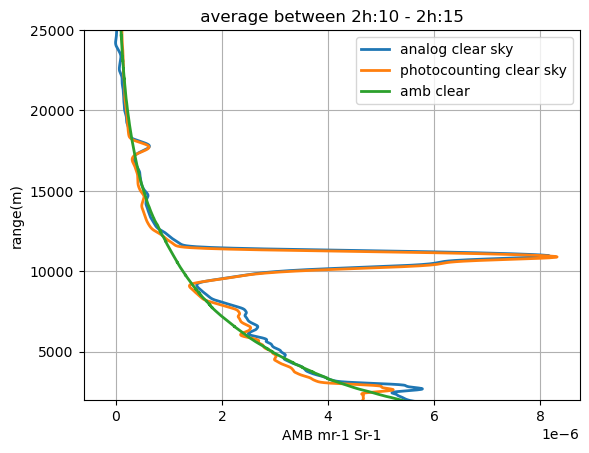

In [256]:
ATB_an = K_avrg_analog*(analog_for_comparision-delta_avrg_analog)
ATB_ph = K_avrg_ph*(photocounting_for_comparision-delta_avrg_ph)


ATB_an = K_avrg_analog*(analog_for_comparision-delta_avrg_analog)
ATB_ph = K_avrg_ph*(photocounting_for_comparision-delta_avrg_ph)





ATB_an_clear= K_avrg_analog*(analog_filterd_clear-delta_avrg_analog)
ATB_ph_clear= K_avrg_ph*(photocounting_filterd_clear-delta_avrg_ph)

print(K_avrg_analog)

plt.plot(ATB_an_clear , alt , label = "analog clear sky" , linewidth = 2)
plt.plot(ATB_ph_clear , alt , label = "photocounting clear sky" , linewidth = 2)


# plt.axhline(y=6000, color='r', linestyle='--', linewidth=2)
# plt.axhline(y=11000, color='r', linestyle='--', linewidth=2)



plt.plot(AMB_clear , alt , label="amb clear" , linewidth = 2)
plt.legend()
plt.grid("True")
plt.title(f" average between 2h:10 - 2h:15 ")
plt.ylabel("range(m)")
plt.xlabel("AMB mr-1 Sr-1")

plt.ylim((2000,25000))

(2000.0, 36000.0)

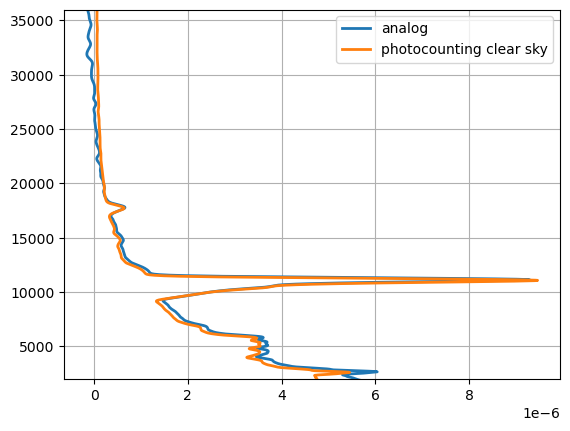

In [257]:


plt.plot(ATB_an , alt , label = "analog" , linewidth = 2)
plt.plot(ATB_ph , alt , label = "photocounting clear sky" , linewidth = 2)
plt.legend()
plt.grid("True")

plt.ylim((2000,36000))

In [64]:
# # check the gluung function :

# from fit_checks import *



# def glue_signals_at_bins(lower_signal, upper_signal, min_bin, max_bin, c_lower, c_upper, lower_std=None, upper_std=None):
#     """
#     Glue two signals at a given bin range.

#     The signal can be either a 1D array or a 2D array with dimensions (time, range).

#     Both signals are assumed to have the same altitude grid. The final glued signal is calculated
#     performing a linear fade-in/fade-out operation in the glue region.

#     Parameters
#     ----------
#     lower_signal : array
#        The low-range signal to be used. Can be either 1D or 2D with dimensions (time, range).
#     upper_signal : array
#        The high-range signal to be used. Can be either 1D or 2D with dimensions (time, range).
#     min_bin : int
#        The lower bin to perform the gluing
#     max_bin : int
#        The upper bin to perform the gluing
#     c_lower : float
#        Calibration constant of the lower signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is False.
#     c_upper : float
#        Calibration constant of the upper signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is True.
#     lower_std : array
#        The standard deviation of the lower signal.
#     upper_std : array
#        The standard deviation of the upper signal.

#     Returns
#     -------
#     glued_signal: array
#        The glued signal array, same size as lower_signal and upper_signal.
#     glued_std : array
#        Uncertainty of the glued signal
#     c_lower : float
#        Calibration constant of the lower signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is False.
#     c_upper : float
#        Calibration constant of the upper signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is True.
#     """
#     # Ensure that data are 2D-like
#     if lower_signal.ndim == 1:
#         lower_signal = lower_signal[np.newaxis, :]  # Force 2D
#         upper_signal = upper_signal[np.newaxis, :]  # Force 2D
#         axis_added = True
#     else:
#         axis_added = False

#     gluing_length = max_bin - min_bin

#     lower_weights = np.zeros_like(lower_signal)

#     lower_weights[:, :min_bin] = 1
#     lower_weights[:, min_bin:max_bin] = 1 - np.arange(gluing_length) / float(gluing_length)

#     upper_weights = 1 - lower_weights

#     # Calculate the glued signal
#     glued_signal = c_lower * lower_weights * lower_signal + c_upper * upper_weights * upper_signal

#     if (upper_std is not None) and (lower_std is not None):
#         glued_std = np.sqrt(c_lower**2 * lower_weights**2 * lower_std**2 + c_upper**2 * upper_weights**2 * upper_std**2)
#     else:
#         glued_std = None

#     # Remove dummy axis, if added
#     if axis_added:
#         glued_signal = glued_signal[0, :]

#     return glued_signal, glued_std, c_lower, c_upper



# def calculate_gluing_values(lower_gluing_region, upper_gluing_region, use_upper_as_reference):
#     """
#     Calculate the multiplicative calibration constants for gluing the two signals.

#     Parameters
#     ----------
#     lower_gluing_region: array
#        The low-range signal to be used. Can be either 1D or 2D with dimensions (time, range).
#     upper_gluing_region: array
#        The high-range signal to be used. Can be either 1D or 2D with dimensions (time, range).
#     use_upper_as_reference: bool
#        If True, the upper signal is used as reference. Else, the lower signal is used.

#     Returns
#     -------
#     c_lower: float
#        Calibration constant of the lower signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is False.
#     c_upper: float
#        Calibration constant of the upper signal. It will be equal to 1, if `use_upper_as_reference` argument
#        is True.
#     """
#     lower_gluing_region = lower_gluing_region.ravel()  # Ensure we have an 1D array using ravel
#     upper_gluing_region = upper_gluing_region.ravel()

#     # Find their linear relationship, using least squares
#     slope_zero_intercept, _, _, _ = np.linalg.lstsq(lower_gluing_region[:, np.newaxis], upper_gluing_region)

#     # Set the calibration constants
#     if use_upper_as_reference:
#         c_upper = 1
#         c_lower = slope_zero_intercept
#     else:
#         c_upper = 1 / slope_zero_intercept
#         c_lower = 1

#     return c_lower, c_upper






# def get_sliding_gluing_score(lower_signal, upper_signal, window_length, correlation_threshold, intercept_threshold,
#                              gaussian_threshold, minmax_threshold):
#     """ Get gluing score.

#     Parameters
#     ----------
#     lower_signal : array
#        The low-range signal to be used.
#     upper_signal : array
#        The high-range signal to be used.
#     window_length : int
#        The number of bins to be used for gluing
#     correlation_threshold : float
#        Threshold for the correlation coefficient
#     intercept_threshold : float
#        Threshold for the linear fit intercept
#     gaussian_threshold : float
#        Threshold for the Shapiro-Wilk p-value.
#     minmax_threshold : float
#        Threshold for the min/max ratio.

#     Returns
#     -------
#     gluing_score : masked array
#        A score indicating regions were gluing is better. Regions were gluing is not possible are masked.
#     """





#     # Get values of various gluing tests
#     intercept_values, correlation_values = sliding_check_linear_fit_intercept_and_correlation(lower_signal,
#                                                                                                          upper_signal,
#                                                                                                          window_length)

#     gaussian_values = sliding_check_residuals_not_gaussian(lower_signal, upper_signal, window_length)

#     minmax_ratio_values = sliding_check_min_max_ratio(lower_signal, upper_signal, window_length)

#     # Find regions where all tests pass
#     correlation_mask = correlation_values > correlation_threshold
#     intercept_mask = intercept_values < intercept_threshold
#     not_gaussian_mask = gaussian_values < gaussian_threshold
#     minmax_ratio_large_mask = minmax_ratio_values > minmax_threshold

#     gluing_possible = correlation_mask & intercept_mask & ~not_gaussian_mask & minmax_ratio_large_mask

#     if not np.any(gluing_possible):
#         raise ValueError("No suitable gluing regions found.")

#     # Calculate a (arbitrary) cost function to decide which region is best
#     intercept_scale_value = 40.
#     intercept_values[intercept_values > intercept_scale_value] = intercept_scale_value
#     intercept_score = 1 - intercept_values / intercept_scale_value

#     gluing_score = correlation_values * intercept_score * minmax_ratio_values

#     # Mask regions were gluing is not possible
#     gluing_score = np.ma.masked_where(~gluing_possible, gluing_score)

#     return gluing_score




# def glue_signals_1d(lower_signal, upper_signal, window_length=200, correlation_threshold=0.95,
#                     intercept_threshold=0.5, gaussian_threshold=0.2, minmax_threshold=0.5,
#                     min_idx=None, max_idx=None, use_upper_as_reference=True, lower_std=None, upper_std=None):
#     """
#     Automatically glue two signals.

#     Parameters
#     ----------
#     lower_signal: array
#        The low-range signal to be used.
#     upper_signal: array
#        The high-range signal to be used.
#     window_length: int
#        The number of bins to be used for gluing
#     correlation_threshold: float
#        Threshold for the correlation coefficient
#     intercept_threshold:
#        Threshold for the linear fit intercept
#     gaussian_threshold:
#        Threshold for the Shapiro-Wilk p-value.
#     minmax_threshold:
#        Threshold for the min/max ratio
#     min_idx, max_idx: int
#        Minimum and maximum index to search for a gluing region.
#     use_upper_as_reference: bool
#        If True, the upper signal is used as reference. Else, the lower signal is used.
#     lower_std : array
#        The standard deviation of the lower signal.
#     upper_std : array
#        The standard deviation of the upper signal.

#     Returns
#     -------
#     glued_signal: array
#        The glued signal array, same size as lower_signal and upper_signal.
#     gluing_center_idx: int
#        Index choses to perform gluing.
#     gluing_score: float
#        The gluing score at the chosen point.
#     c_lower, c_upper: floats
#        Calibration constant of the lower and upper signal. One of them will be 1, depending on the
#        value of `use_upper_as_reference` argument.
#     """
#     lower_signal_cut = lower_signal[min_idx:max_idx]
#     upper_signal_cut = upper_signal[min_idx:max_idx]

#     gluing_score = get_sliding_gluing_score(lower_signal_cut, upper_signal_cut, window_length, correlation_threshold,
#                                             intercept_threshold, gaussian_threshold, minmax_threshold)

#     gluing_center_idx_cut = np.argmax(gluing_score)
#     gluing_center_idx = gluing_center_idx_cut + min_idx  # Index of the original, uncut signals

#     min_gluing_idx = int(gluing_center_idx - window_length // 2)
#     max_gluing_idx = int(gluing_center_idx + window_length // 2)

#     # Extract the gluing region
#     lower_gluing_region = lower_signal[min_gluing_idx:max_gluing_idx]
#     upper_gluing_region = upper_signal[min_gluing_idx:max_gluing_idx]

#     # Calculate weights to fade-in/fade-out signals in gluing region.
#     c_lower, c_upper = calculate_gluing_values(lower_gluing_region, upper_gluing_region, use_upper_as_reference)


#     # Perform gluing
#     glued_signal, gluing_std, _, _ = glue_signals_at_bins(lower_signal, upper_signal, min_gluing_idx, max_gluing_idx, c_lower,
#                                               c_upper, lower_std=lower_std, upper_std=upper_std)

#     return glued_signal, gluing_std, gluing_center_idx, gluing_score[gluing_center_idx_cut], c_lower, c_upper





# window_length = 100
# correlation_threshold = 0.9
# intercept_threshold = 5
# gaussian_threshold = 0.1
# minmax_threshold = 0.5
# min_idx = 500  # 100 * 3.75 = 375,
# max_idx = 900  # 4000 * 3.75 = 15000

# merged_signal_clear, gluing_std, gluing_central_idx, score, c_lower, c_upper = glue_signals_1d(
#     ATB_an_clear, 
#     ATB_ph_clear, 
#     window_length,
#     correlation_threshold, 
#     intercept_threshold, 
#     gaussian_threshold,
#     minmax_threshold, 
#     min_idx, 
#     max_idx
    
# )



# # 
# plt.plot(ATB_an_clear)
# plt.plot(ATB_ph_clear)
# plt.plot(merged_signal_clear)

In [20]:
# window_length = 100
# correlation_threshold = 0.9
# intercept_threshold = 5
# gaussian_threshold = 0.1
# minmax_threshold = 0.5
# min_idx = 600  # 100 * 3.75 = 375,
# max_idx = 1200  # 4000 * 3.75 = 15000

# merged_signal, merged_std, gluing_central_idx, score, c_lower, c_upper = glue_signals_1d(
#     ATB_an, 
#     ATB_ph, 
#     window_length,
#     correlation_threshold, 
#     intercept_threshold, 
#     gaussian_threshold,
#     minmax_threshold, 
#     min_idx, 
#     max_idx
    
# )



# plt.plot(ATB_an)
# plt.plot(ATB_ph)
# plt.plot(merged_signal)


# merged_signal  =merged_signal_hanning(ATB_an, ATB_ph, alt )


Mean relative error:  68.25995553717156 %
Max relative error:  624.6372477991976 %
RMS relative error:  113.26345952682821 %


(2000.0, 25000.0)

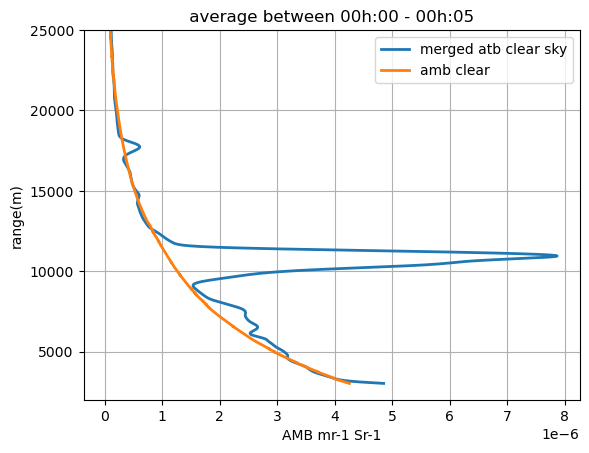

In [259]:


def merged_signal_hanning(analog, photocounting, altitude, transition_start=15000, transition_end=20000):

    merged_signal = np.zeros_like(analog)
    
    mask_low = altitude < transition_start
    mask_high = altitude > transition_end
    mask_transition = (altitude >= transition_start) & (altitude <= transition_end)
    
    merged_signal[mask_low] = analog[mask_low]
    merged_signal[mask_high] = photocounting[mask_high]
    
    # Zone de transition avec fenêtre de Hanning
    if np.any(mask_transition):
        n_trans = np.sum(mask_transition)

        hanning_window = 0.5 * (1 - np.cos(np.pi * np.arange(n_trans) / (n_trans - 1)))
        
        merged_signal[mask_transition] = (
            (1 - hanning_window) * analog[mask_transition] + 
            hanning_window * photocounting[mask_transition]
        )
    
    merged_signal_filtered = gaussian_filter1d(merged_signal, sigma=6)
    
    return merged_signal_filtered

merged_signal_clear =merged_signal_hanning(ATB_an_clear, ATB_ph_clear, alt )

merged_std= merged_signal_hanning(K_avrg_analog * std_analog , K_avrg_ph * std_photo , alt )

merged_signal  =merged_signal_hanning(ATB_an, ATB_ph, alt )


relative_error = (merged_signal_clear[200:3000] - AMB_clear[200:3000]) / AMB_clear[200:3000] * 100.0
print('Mean relative error: ', np.nanmean(relative_error), '%')
print('Max relative error: ', np.nanmax(np.abs(relative_error)), '%')
print('RMS relative error: ', np.sqrt(np.nanmean(relative_error**2)), '%')

plt.plot(merged_signal_clear[200:-1] , alt[200:-1] , label = "merged atb clear sky" , linewidth = 2 )
plt.plot(AMB_clear[200:-1] , alt[200:-1] , label="amb clear" , linewidth = 2)
plt.grid(True)
plt.ylim((2000,30000))
plt.legend()
plt.title(f" average between 00h:00 - 00h:05 ")
plt.ylabel("range(m)")
plt.xlabel("AMB mr-1 Sr-1")
plt.ylim((2000,25000))


In [260]:
print(merged_signal_clear -AMB_clear )

[-7.99622674e-06 -7.97895798e-06 -7.96172540e-06 ...  2.23072914e-08
  2.22935959e-08  2.22869795e-08]


# beta part cormparaison 

In [261]:
"""
Retrieval of aerosol optical properties from elastic lidar signals.

.. todo::
   Implement iterative retrieval (Di Girollamo et al. 1999)
"""

import numpy as np
from scipy.signal import savgol_filter
from scipy.integrate import cumtrapz





def klett_backscatter_aerosol_simplifié(S, l_aer, beta_mol, index_reference,reference_range, beta_aer_R0, bin_length, l_mol=8.73965404 , affiche = False):
    
    # calculat B : ----------------------------
    beta_mol_R0, S_R0 = get_reference_values(beta_mol, index_reference, S, reference_range)
    B = S_R0 / (beta_aer_R0 + beta_mol_R0)
    
    # calculat A : -------------------------------
    tau_integral_argument = (l_aer - l_mol) * beta_mol
    tau_integral = integrate_from_reference_trapezoid(tau_integral_argument, index_reference , bin_length)
    
    
    tau = np.exp(-2 * tau_integral)
    A = S * tau
    

    
    # calculat C : ------------------------------------
    C_integral_argument = l_aer * S * tau
    C_integral = integrate_from_reference_trapezoid(C_integral_argument, index_reference , bin_length)
    C = 2 * C_integral
    
    # Sum of aerosol and molecular backscatter coefficients.
    beta_sum = A / (B - C)
    
    
    # Aerosol backscatter coefficient.
    beta_aerosol = beta_sum - beta_mol
    
    if (affiche):
        relative_error = (beta_sum - beta_mol) / beta_mol * 100.0
        print('Mean relative error: ', np.mean(relative_error), '%')
        print('Max relative error: ', np.max(np.abs(relative_error)), '%')
        print('RMS relative error: ', np.sqrt(np.mean(relative_error**2)), '%')
    
    
    return beta_aerosol, beta_sum 




def get_reference_values(beta_molecular, index_reference, range_corrected_signal, reference_range):
    idx_min = index_reference - reference_range
    idx_max = index_reference + reference_range
    
    range_corrected_signal_reference = np.mean(range_corrected_signal[idx_min:idx_max+1])
    beta_molecular_reference = np.mean(beta_molecular[idx_min:idx_max+1]) 
    
    return beta_molecular_reference, range_corrected_signal_reference
    
    


def integrate_from_reference_trapezoid(integral_argument, index_reference, bin_length):
    """
    Calculate the cumulative integral of `integral_argument` from the reference point
    using trapezoidal integration.
    
    Parameters
    ----------
    integral_argument : array_like
        The argument to integrate (e.g., LR_part * RCS * exp(2*S_m))
    index_reference : integer
        The index of the reference height (bins)
    bin_length : float
        The vertical bin length (m)
    
    Returns
    -------
    integral : array_like
        The cumulative integral from the reference point
    """
    N_Z = len(integral_argument)
    integral = np.zeros(N_Z)
    
    # Set reference point to zero
    integral[index_reference] = 0.0
    
    # Below reference: integrate from ref down to beginning
    for i_Z in range(index_reference - 1, -1, -1):
        # Trapezoidal rule: (f[i+1] + f[i]) / 2 * dz
        integral[i_Z] = integral[i_Z + 1] - 0.5 * (integral_argument[i_Z + 1] + 
                                                     integral_argument[i_Z]) * bin_length
    
    # Above reference: integrate from ref up to end
    for i_Z in range(index_reference + 1, N_Z):
        # Trapezoidal rule: note the sign change
        integral[i_Z] = integral[i_Z - 1] + 0.5 * (integral_argument[i_Z - 1] + 
                                                     integral_argument[i_Z]) * bin_length
    
    return integral


## take care of nan values 

(2000.0, 40000.0)

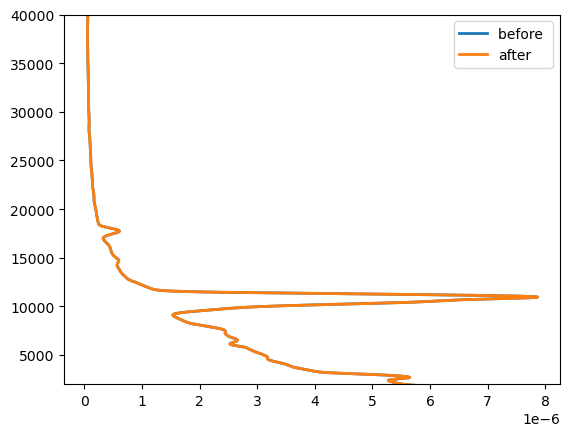

In [262]:
merged_signal_clean = np.nan_to_num(merged_signal, nan=0.0)
mask_valid_0 = ~np.isnan(merged_signal)
if np.sum(mask_valid_0) > 10:  # Au moins 10 points valides
    merged_signal_clean = np.interp(alt, alt[mask_valid_0], merged_signal[mask_valid_0])
else:
    merged_signal_clean = np.nan_to_num(merged_signal, nan=1e-7)




beta_ray_355_clean = np.nan_to_num(beta_ray_355, nan=0.0)
mask_valid = ~np.isnan(beta_ray_355)
if np.sum(mask_valid) > 10:  # Au moins 10 points valides
    beta_ray_355_clean = np.interp(alt, alt[mask_valid], beta_ray_355[mask_valid])
else:
    beta_ray_355_clean = np.nan_to_num(beta_ray_355, nan=1e-7)




AMB_clear_clean = np.nan_to_num(AMB_clear, nan=0.0)
mask_valid_ = ~np.isnan(AMB_clear)
if np.sum(mask_valid_) > 10:  # Au moins 10 points valides
    AMB_clear_clean = np.interp(alt, alt[mask_valid_], AMB_clear[mask_valid_])
else:
    AMB_clear_clean = np.nan_to_num(AMB_clear, nan=1e-7)




merged_signal_clear_clean = np.nan_to_num(merged_signal_clear, nan=0.0)
mask_valid_2 = ~np.isnan(merged_signal_clear)
if np.sum(mask_valid_2) > 10:  # Au moins 10 points valides
    merged_signal_clear_clean = np.interp(alt, alt[mask_valid_2], merged_signal_clear[mask_valid_2])
else:
    merged_signal_clear_clean = np.nan_to_num(merged_signal_clear, nan=1e-7)
    
plt.plot(merged_signal_clear , alt , label = "before " , linewidth = 2)

plt.plot(merged_signal_clear_clean , alt , label = "after" , linewidth = 2)
plt.legend()
plt.ylim((2000,40000))



# test on clear sky calculé

Mean relative error:  0.7299557764486966 %
Max relative error:  1.6423897391632227 %
RMS relative error:  1.0608882431595674 %


(2000.0, 40000.0)

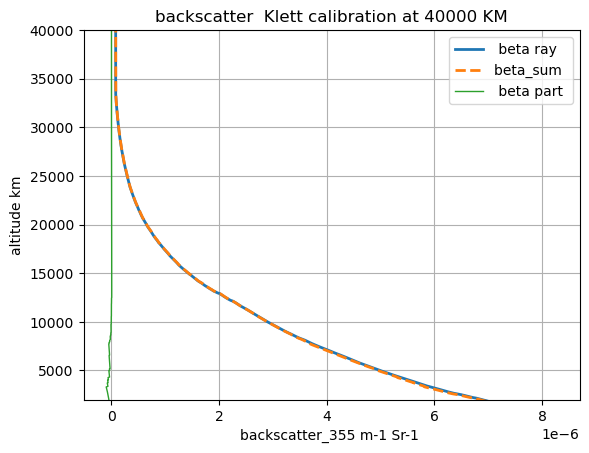

In [326]:
INDEX_FOR_THE_CALIBRATION = 40000  # in  km 

index_reference = np.argmin(np.abs(alt -INDEX_FOR_THE_CALIBRATION ))
reference_range = 500   
beta_aerosol_reference = 1e-9
bin_length = np.abs(np.median(np.diff(alt))) 

# just taking care of nan values :



beta_aerosol_simp_clear_calculated , beta_sum = klett_backscatter_aerosol_simplifié( AMB_clear_clean,50,beta_ray_355_clean,index_reference,reference_range,beta_aerosol_reference,bin_length,8*np.pi/3 , affiche=True)


plt.plot(beta_ray_355_clean , alt , label = " beta ray ", linewidth = 2 )
plt.plot(beta_sum, alt , label = "beta_sum " , linewidth = 2 , linestyle = "--")
plt.plot(beta_aerosol_simp_clear_calculated , alt , label = " beta part ", linewidth = 1 )


plt.xlabel("backscatter_355 m-1 Sr-1 ")
plt.ylabel("altitude km")
plt.title(f"backscatter  Klett calibration at {INDEX_FOR_THE_CALIBRATION} KM")
plt.grid("True")
plt.legend()

plt.ylim((2000,40000))
# plt.xlim((-1e-6,1e-6))

## test on clear sky calculé

MAE = 4.559e-07
RMSE = 1.078e-06
Bias = 1.391e-07
MAPE = 107.30%


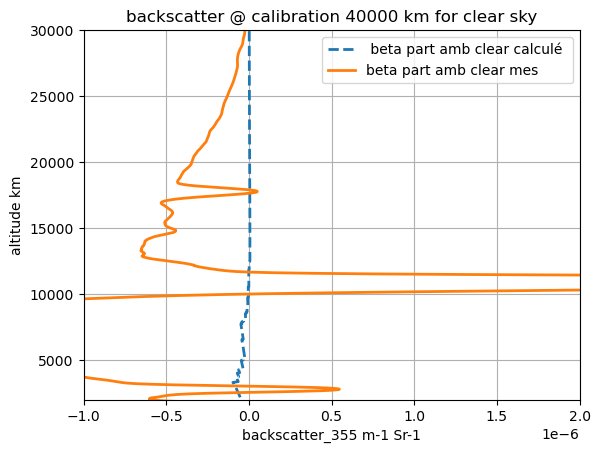

In [327]:
beta_aerosol_simp_clear_mesured , beta_sum_simp_clear_meus = klett_backscatter_aerosol_simplifié( merged_signal_clear_clean,50,beta_ray_355_clean,index_reference,reference_range,beta_aerosol_reference,bin_length,8*np.pi/3  )


plt.plot(beta_aerosol_simp_clear_calculated , alt , label = " beta part amb clear calculé ", linewidth = 2 , linestyle="--" )
plt.plot(beta_aerosol_simp_clear_mesured, alt , label = "beta part amb clear mes" , linewidth = 2)



plt.xlabel("backscatter_355 m-1 Sr-1")
plt.ylabel("altitude km")
plt.title(f"backscatter @ calibration {INDEX_FOR_THE_CALIBRATION} km for clear sky")
plt.grid("True")
plt.legend()



plt.ylim((2000,30000))
plt.xlim((-1e-6,2e-6))


y_calc = beta_aerosol_simp_clear_calculated[300:3000]
y_meas = beta_aerosol_simp_clear_mesured[300:3000]

mae = np.nanmean(np.abs(y_calc - y_meas))
rmse = np.sqrt(np.nanmean((y_calc - y_meas)**2))
bias = np.nanmean(y_calc - y_meas)
mape = np.nanmean(np.abs((y_calc - y_meas) / y_meas)) * 100

print(f"MAE = {mae:.3e}")
print(f"RMSE = {rmse:.3e}")
print(f"Bias = {bias:.3e}")
print(f"MAPE = {mape:.2f}%")


# Comparaison with Atlid 

In [322]:
beta_aerosol_simp_aer , __ = klett_backscatter_aerosol_simplifié( merged_signal_clean,20,beta_ray_355_clean,index_reference,reference_range,beta_aerosol_reference,bin_length,8*np.pi/3)


In [329]:

print(data['ATLID_L2_300km'].keys())


data_atlid = data
print(data_atlid.keys())



min_indx_l2 = int(data_atlid["ATLID_L2_300km"]["min_index"][()])



intrvl = 150
start_idx = min_indx_l2 - intrvl
end_idx = min_indx_l2 + intrvl


backscatter_355_atlid = np.array(data_atlid["ATLID_L2_300km"]["particle_backscatter_coefficient_355nm"][start_idx:end_idx][:])
APB_355_atlid = np.array(data_atlid["ATLID_L2_300km"]["APB"][:,start_idx:end_idx])
AMB_355_atlid = np.array(data_atlid["ATLID_L2_300km"]["AMB"][:,start_idx:end_idx])

altitude_atlid = np.array(data_atlid["ATLID_L2_300km"]["height"][start_idx:end_idx][:])

print(np.shape(APB_355_atlid))


backscatter_355_atlid = np.where(backscatter_355_atlid > 1e35 , np.nan , backscatter_355_atlid)
APB_355_atlid = np.where(APB_355_atlid > 1e34 , np.nan , APB_355_atlid)
AMB_355_atlid = np.where(AMB_355_atlid > 1e34 , np.nan , AMB_355_atlid)

APB_355_atlid = np.where(APB_355_atlid < 0 , np.nan , APB_355_atlid)
AMB_355_atlid = np.where(AMB_355_atlid < 0 , np.nan , AMB_355_atlid)



backscatter_355_atlid_avrg = np.nanmean(backscatter_355_atlid , axis=0)
APB_355_atlid_avrg = np.nanmean(APB_355_atlid , axis=1)
AMB_355_atlid_avrg = np.nanmean(AMB_355_atlid , axis=1)

print(np.shape(AMB_355_atlid_avrg))

std_beta_part_atlid =np.std(backscatter_355_atlid , axis=0)

altitude_atlid_avrg = np.nanmean(altitude_atlid , axis=0)



<KeysViewHDF5 ['AMB', 'AMB_clear', 'APB', 'conc', 'depol', 'file name', 'height', 'latitude', 'longitude', 'min_distance_km', 'min_index', 'particle_backscatter_coefficient_355nm', 'particle_backscatter_coefficient_355nm_error', 'particle_extinction_coefficient_355nm', 'particle_linear_depol_ratio_355nm_low_resolution', 'range', 'rayleigh_attenuated_backscatter_355nm', 'rayleigh_attenuated_backscatter_355nm_error', 'rayleigh_backscatter_355nm_model', 'simple_classification', 'time', 'total_attenuated_backscatter_355nm', 'total_attenuated_backscatter_355nm_error']>
<KeysViewHDF5 ['ATLID_L1_300km', 'ATLID_L2_300km', 'IPRAL']>
(242, 300)
(242,)


/tmp/ipykernel_12596/1961694750.py:36: RuntimeWarning: Mean of empty slice
  backscatter_355_atlid_avrg = np.nanmean(backscatter_355_atlid , axis=0)
/tmp/ipykernel_12596/1961694750.py:37: RuntimeWarning: Mean of empty slice
  APB_355_atlid_avrg = np.nanmean(APB_355_atlid , axis=1)
/tmp/ipykernel_12596/1961694750.py:38: RuntimeWarning: Mean of empty slice
  AMB_355_atlid_avrg = np.nanmean(AMB_355_atlid , axis=1)


(500.0, 30000.0)

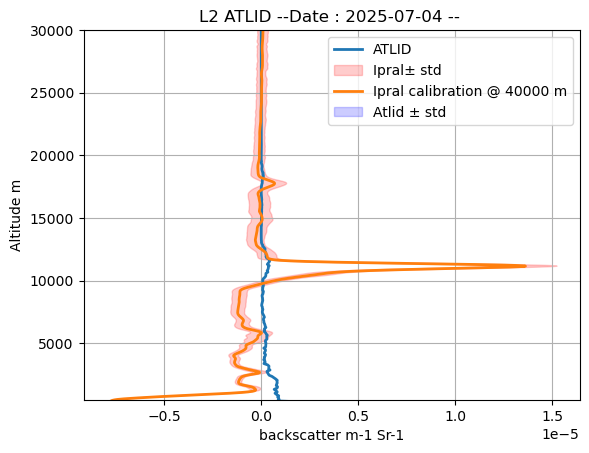

In [331]:






DATE= "2025-07-04"
date = DATE.replace("-", "_")



plt.plot(backscatter_355_atlid_avrg , altitude_atlid_avrg,label= "ATLID" , linewidth =2)
plt.fill_betweenx(alt,
        beta_aerosol_simp_aer - merged_std,
        beta_aerosol_simp_aer + merged_std,
        color='red', alpha=0.2, label="Ipral± std")
plt.plot(beta_aerosol_simp_aer , alt , label = f"Ipral calibration @ {INDEX_FOR_THE_CALIBRATION} m" ,  linewidth =2)

plt.fill_betweenx(altitude_atlid_avrg,
        backscatter_355_atlid_avrg - std_beta_part_atlid,
        backscatter_355_atlid_avrg + std_beta_part_atlid,
        color='Blue', alpha=0.2, label="Atlid ± std")




plt.title(f"L2 ATLID --Date : {DATE} -- ")

plt.xlabel("backscatter m-1 Sr-1")
plt.ylabel("Altitude m")
plt.grid("True")
plt.legend()
plt.ylim((500,30000))
# plt.xlim((-0.4e-6,0.2e-5))

(4000,)
(4000,)


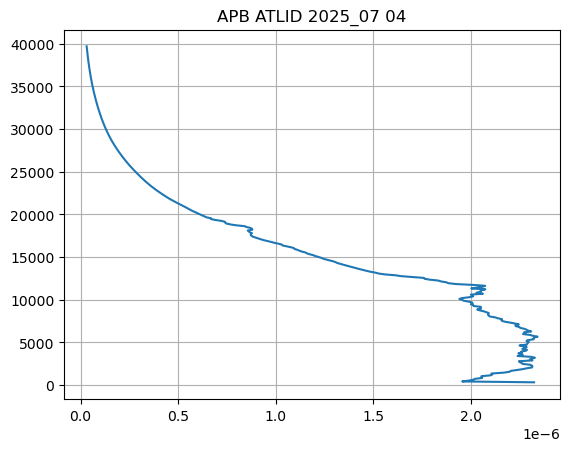

In [291]:
print(np.shape( merged_signal_clean ))
print(np.shape(  merged_signal_clear_clean))


SR_ipral = 1 + ( beta_aerosol_simp_aer / beta_ray_355 ) 
SR_atlid = (APB_355_atlid_avrg+ AMB_355_atlid_avrg ) / APB_355_atlid_avrg



# plt.plot(SR_ipral , alt)
plt.title("APB ATLID 2025_07 04")
plt.plot(APB_355_atlid_avrg , altitude_atlid_avrg, label = "SR ATLID" ) 
plt.grid(True)
# plt.ylim((2000,30000))
# plt.legend()
# plt.xlim((0,2))

In [272]:
def compare_curves_robust(y1, y2, zero_threshold):
    mean_weight = 0.5
    y1 = np.asarray(y1, dtype=float)
    y2 = np.asarray(y2, dtype=float)
    
    mean1, mean2 = np.mean(y1), np.mean(y2)
    std1, std2 = np.std(y1), np.std(y2)
    
    is_y1_zero = abs(mean1) < zero_threshold and std1 < zero_threshold
    is_y2_zero = abs(mean2) < zero_threshold and std2 < zero_threshold
    
    if is_y1_zero or is_y2_zero:
        return 0.0
    
    # Shape similarity via correlation
    correlation = np.corrcoef(y1, y2)[0, 1]
    correlation = np.clip(correlation, -1, 1)
    shape_score = (correlation + 1.) / 2.
    
    # Mean similarity (normalized by average magnitude)
    mean_diff = abs(mean1 - mean2)
    avg_mean = (abs(mean1) + abs(mean2)) / 2
    mean_score = np.exp(-(mean_diff / avg_mean)) if avg_mean > zero_threshold else 0.0
        
    # Combine
    cs = (1 - mean_weight) * shape_score + mean_weight * mean_score
    
    return float(cs)





In [31]:
# cs_L1 = compare_curves_robust(backscatter_355_atlid_avrg, beta_aerosol_simp_aer, zero_threshold=0) 

In [56]:
SR = 1 + (beta_aerosol_simp_aer / beta_ray_355)



min_indx_l1 = int(data_atlid["ATLID1_R100KM"]["min_index"][:])

intrvl_1= 1500
start_idx_1 =max(0 ,min_indx_l1 - intrvl_1 )
end_idx_1= min_indx_l1+ intrvl_1 


apb_atlid = np.array(data_atlid["ATLID1_R100KM"]["mie_attenuated_backscatter"][start_idx_1:end_idx_1][:])
amb_atlid = np.array(data_atlid["ATLID1_R100KM"]["rayleigh_attenuated_backscatter"][start_idx_1:end_idx_1][:])
altitude_atlid_l1 = np.array(data_atlid["ATLID1_R100KM"]["altitude"][start_idx_1:end_idx_1][:])



amb_atlid_avrg = np.nanmean(amb_atlid , axis=0)
apb_atlid_avrg = np.nanmean(apb_atlid , axis=0)
altitude_atlid_l1_avrg = np.nanmean(altitude_atlid_l1 , axis=0)


sr_atlid = (amb_atlid_avrg+apb_atlid_avrg) /amb_atlid_avrg

plt.plot(sr_atlid ,altitude_atlid_l1_avrg , label ="sr atlid" , linewidth = 2)
plt.plot(SR , alt , label = "SR IPRAL" ,  linewidth = 2)
plt.legend()
plt.title(f"L1 ATLID -- Date : {DATE} --")
plt.xlabel("scattering_ratio")
plt.ylabel("Altitude m")
plt.legend()
plt.grid("True")


plt.ylim((2000,30000))
plt.xlim((0,2))

print(data_atlid["ATLID1_R100KM"].keys())

KeyError: "Unable to synchronously open object (object 'ATLID1_R100KM' doesn't exist)"

In [ ]:
# # Sergey
# np.savetxt('sergey_beta.txt', np.column_stack([altitude, backscatter_355]), fmt='%.8e')

# # Arezki backscatter
# np.savetxt('arezki_beta.txt', np.column_stack([altitude_ipral, beta_part]), fmt='%.8e')

# # Arezki signal
# np.savetxt('calibrated_merged_signal.txt', np.column_stack([alt, merged_signal]), fmt='%.8e')






def detect_clear_sky_simple(signal, altitude, range_alt=[3000 ,25000 ], n_consecutive=3 , tolerance=0.002):
   
    
    # Prendre jusqu'à max_alt
    mask =(altitude >= range_alt[0] ) & (altitude <= range_alt[1] )
    signal_check = signal[mask]
    altitude_check = altitude[mask]
    print(altitude_check) 

    
    consecutive_increases = 0
    
    for i in range(len(signal_check) - 1):
        
        
        current = signal_check[i]
        next_val = signal_check[i+1]
    
        relative_increase = (next_val - current) / current
        
        # Si signal augmente
        if relative_increase > tolerance:
            consecutive_increases += 1
            
            # Si 3 augmentations consécutives → PARTICLES !
            if consecutive_increases >= n_consecutive:
                problem_altitude = altitude_check[i - n_consecutive + 1]
                return problem_altitude
        else:
            consecutive_increases = 0
    
    print("✅ CLEAR SKY détecté")
    return True

# Utilisation ultra-simple
result = detect_clear_sky_simple(merged_signal, alt)

if result is True:
    print("C'est clear sky!")
else:
    print(f"Particles trouvées à l'altitude: {result:.0f}m")

[ 3000.  3015.  3030. ... 24960. 24975. 24990.]
Particles trouvées à l'altitude: 10950m


In [ ]:
def detect_clear_sky_simple(signal, altitude, range_alt=[3000 ,25000 ], n_consecutive=3 , tolerance=0.002):
   
    
    # Prendre jusqu'à max_alt
    mask =(altitude >= range_alt[0] ) & (altitude <= range_alt[1] )
    signal_check = signal[mask]
    altitude_check = altitude[mask]
    print(altitude_check) 

    
    consecutive_increases = 0
    
    for i in range(len(signal_check) - 1):
        
        
        current = signal_check[i]
        next_val = signal_check[i+1]
    
        relative_increase = (next_val - current) / current
        
        # Si signal augmente
        if relative_increase > tolerance:
            consecutive_increases += 1
            
            # Si 3 augmentations consécutives → PARTICLES !
            if consecutive_increases >= n_consecutive:
                problem_altitude = altitude_check[i - n_consecutive + 1]
                return problem_altitude
        else:
            consecutive_increases = 0
    
    print("✅ CLEAR SKY détecté")
    return True

result_ph = detect_clear_sky_simple(photocounting_filterd_clear, alt , range_alt=[4000 ,25000 ])
result_an = detect_clear_sky_simple(analog_filterd_clear, alt)


if result_ph is True:
    print("photocounting -> C'est clear sky!")
else:
    print(f"photocounting -> Particles trouvées à l'altitude: {result_ph:.0f}m")
    
    
    
if result_an is True:
    print("analog -> C'est clear sky!")
else:
    print(f"analog -> Particles trouvées à l'altitude: {result_an:.0f}m")
    
    



# usefull one i think !!

[ 4005.  4020.  4035. ... 24960. 24975. 24990.]
[ 3000.  3015.  3030. ... 24960. 24975. 24990.]
photocounting -> Particles trouvées à l'altitude: 13635m
analog -> Particles trouvées à l'altitude: 13650m


## save the data 

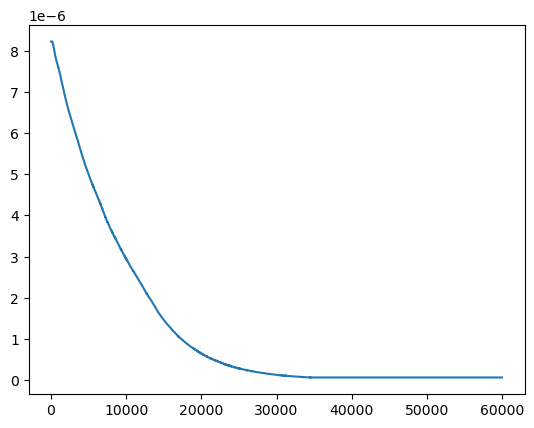

In [ ]:
AMB_clear  , beta_ray_355 , alpha_ray_355 



np.savetxt('AMB_clear.txt', np.column_stack([alt, AMB_clear_clean]), fmt='%.8e')
np.savetxt('beta_ray_355.txt', np.column_stack([alt, beta_ray_355]), fmt='%.8e')
np.savetxt('alpha_ray_355.txt', np.column_stack([alt, alpha_ray_355]), fmt='%.8e')


plt.plot(alt , beta_ray_355)